# <ul>Air Quality Index-Anlysis</ul>

* Anlysation Of Air quality index Across indaian states
* Consist Of two datas,
  1) of AQI checking station Details
  2) Day Wise AQI report of Station
* Model For predict AQI&AQI_Bucket(Air Quality Condition

In [24]:
import pandas as pd
import numpy as np

## Data Loading&Preproccessing

In [27]:
df1=pd.read_csv(r"C:\Users\midla\OneDrive\Documents\cybersquare\PROJECT\airqualityanalysis\stations.csv")
df2=pd.read_csv(r"C:\Users\midla\OneDrive\Documents\cybersquare\PROJECT\airqualityanalysis\station_day.csv")

In [28]:
df1.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [29]:
df2.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [30]:
dfm=pd.merge(df1,df2,on='StationId',how='inner')
dfm

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


> Merged Station ID infos with station day wise data

In [31]:
dfm.describe().T


,count,mean,std,min,25%,50%,75%,max
PM2.5,86410.0,80.272571,76.526403,0.02,31.880,55.95,99.9200,1000.00
PM10,65329.0,157.968427,123.418672,0.01,70.150,122.09,208.6700,1000.00
NO,90929.0,23.123424,34.491019,0.01,4.840,10.29,24.9800,470.00
NO2,91488.0,35.240760,29.510827,0.01,15.090,27.21,46.9300,448.05
NOx,92535.0,41.195055,45.145976,0.00,13.970,26.66,50.5000,467.63
NH3,59930.0,28.732875,24.897797,0.01,11.900,23.59,38.1375,418.90
CO,95037.0,1.605749,4.369578,0.00,0.530,0.91,1.4500,175.81
SO2,82831.0,12.257634,12.984723,0.01,5.040,8.95,14.9200,195.65
O3,82467.0,38.134836,39.128004,0.01,18.895,30.84,47.1400,963.00
Benzene,76580.0,3.358029,11.156234,0.00,0.160,1.21,3.6100,455.03


In [32]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StationId    108035 non-null  object 
 1   StationName  108035 non-null  object 
 2   City         108035 non-null  object 
 3   State        108035 non-null  object 
 4   Status       107711 non-null  object 
 5   Date         108035 non-null  object 
 6   PM2.5        86410 non-null   float64
 7   PM10         65329 non-null   float64
 8   NO           90929 non-null   float64
 9   NO2          91488 non-null   float64
 10  NOx          92535 non-null   float64
 11  NH3          59930 non-null   float64
 12  CO           95037 non-null   float64
 13  SO2          82831 non-null   float64
 14  O3           82467 non-null   float64
 15  Benzene      76580 non-null   float64
 16  Toluene      69333 non-null   float64
 17  Xylene       22898 non-null   float64
 18  AQI          87025 non-n

In [33]:
dfm['Date']=pd.to_datetime(dfm['Date'])

In [34]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StationId    108035 non-null  object        
 1   StationName  108035 non-null  object        
 2   City         108035 non-null  object        
 3   State        108035 non-null  object        
 4   Status       107711 non-null  object        
 5   Date         108035 non-null  datetime64[ns]
 6   PM2.5        86410 non-null   float64       
 7   PM10         65329 non-null   float64       
 8   NO           90929 non-null   float64       
 9   NO2          91488 non-null   float64       
 10  NOx          92535 non-null   float64       
 11  NH3          59930 non-null   float64       
 12  CO           95037 non-null   float64       
 13  SO2          82831 non-null   float64       
 14  O3           82467 non-null   float64       
 15  Benzene      76580 non-null   floa

## Data Cleaning

In [35]:
dfm.isna().sum()

StationId          0
StationName        0
City               0
State              0
Status           324
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
dtype: int64

# Heat Map Of Before Cleaning Null-Values

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

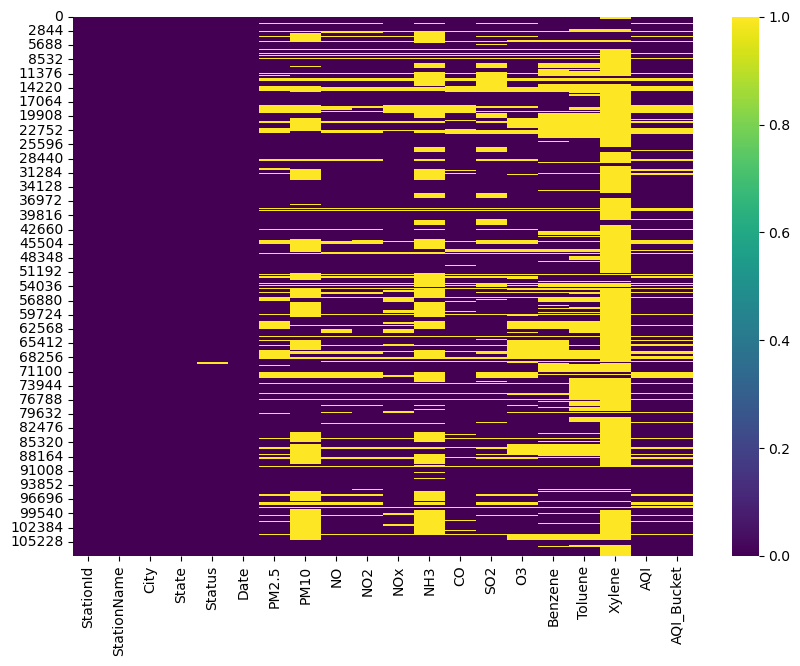

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(dfm.isna(),cmap="viridis")
plt.show()


In [38]:
dfm.shape

(108035, 20)

In [39]:
perc=dfm.isna().sum()/len(dfm)*100
perc

StationId       0.000000
StationName     0.000000
City            0.000000
State           0.000000
Status          0.299903
Date            0.000000
PM2.5          20.016661
PM10           39.529782
NO             15.833758
NO2            15.316333
NOx            14.347202
NH3            44.527237
CO             12.031286
SO2            23.329477
O3             23.666404
Benzene        29.115564
Toluene        35.823576
Xylene         78.805017
AQI            19.447401
AQI_Bucket     19.447401
dtype: float64

> For Cleaining taking features more than 25% to diffrent Datframe to Future analysis,
> Droping All Null Values from features having less than 25% null

In [40]:
dfnull=pd.DataFrame(dfm[['PM10','NH3','Benzene','Toluene','Xylene']])
dfnull

,PM10,NH3,Benzene,Toluene,Xylene
0,115.75,12.19,0.17,5.92,0.10
1,124.50,10.72,0.20,6.50,0.06
2,129.06,10.28,0.22,7.95,0.08
3,135.32,12.91,0.29,7.63,0.12
4,104.09,11.42,0.17,5.02,0.07
...,...,...,...,...,...
108030,16.46,NaN,1.32,7.26,NaN
108031,18.47,NaN,1.42,7.92,NaN
108032,32.26,11.40,3.52,8.64,NaN
108033,39.30,29.26,1.86,8.40,NaN


In [41]:
data=dfm.drop(columns=['PM10','NH3','Benzene','Toluene','Xylene'])
data.isna().sum()

StationId          0
StationName        0
City               0
State              0
Status           324
Date               0
PM2.5          21625
NO             17106
NO2            16547
NOx            15500
CO             12998
SO2            25204
O3             25568
AQI            21010
AQI_Bucket     21010
dtype: int64

In [42]:
data=data.dropna()
data.isna().sum()

StationId      0
StationName    0
City           0
State          0
Status         0
Date           0
PM2.5          0
NO             0
NO2            0
NOx            0
CO             0
SO2            0
O3             0
AQI            0
AQI_Bucket     0
dtype: int64

> Dropped all null values from data

# Heat Map Of Null Values After Cleaning

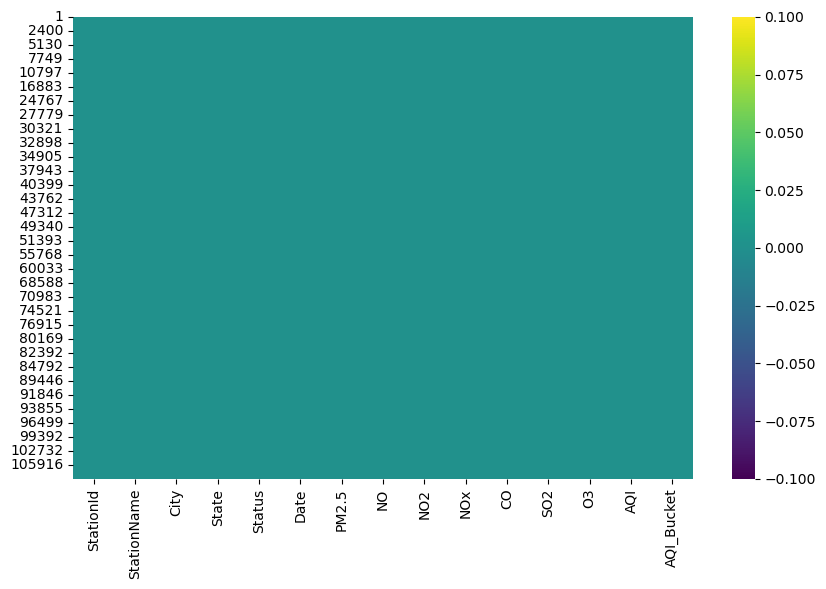

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='viridis')
plt.show()

> NULL Values Hamdled Perfectly,checking contains duplicates

In [44]:
data.duplicated().sum()

0

> Values Repeated=0

## Outlier Detection And Handeling

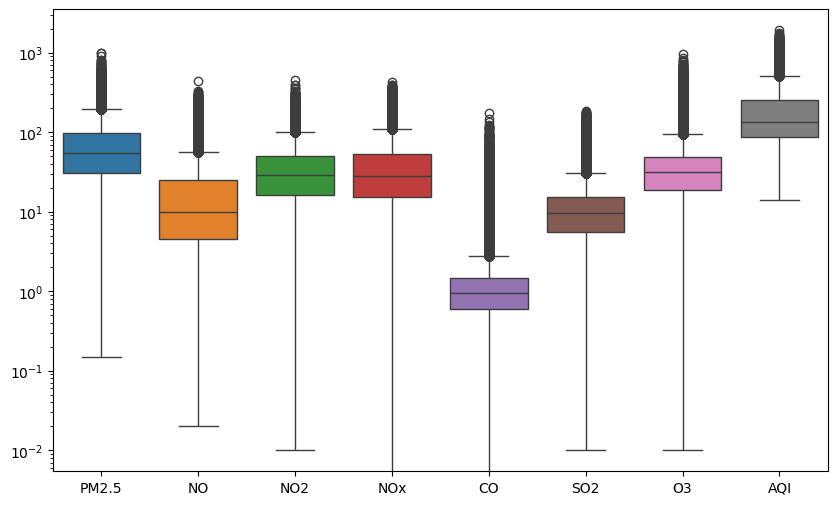

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.yscale('log')

<h3 style="background-color:cyan">From The Graph, There Is Somany outleirs For every features,May be its becuase of the air polution or polutions from firecracks etc. on festival nights,so instead removing caping it for future Anlysis</h3>

In [46]:
for col in data.select_dtypes(include=['float64','int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col+'_outlier'] = ((data[col] < lower) | (data[col] > upper))
data.head()


,StationId,StationName,City,State,Status,Date,PM2.5,NO,NO2,NOx,...,AQI,AQI_Bucket,PM2.5_outlier,NO_outlier,NO2_outlier,NOx_outlier,CO_outlier,SO2_outlier,O3_outlier,AQI_outlier
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,1.44,20.50,12.08,...,184.0,Moderate,False,False,False,False,False,False,True,False
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,1.26,26.00,14.85,...,197.0,Moderate,False,False,False,False,False,False,True,False
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,6.60,30.85,21.77,...,198.0,Moderate,False,False,False,False,False,True,True,False
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,2.56,28.07,17.01,...,188.0,Moderate,False,False,False,False,False,False,True,False
5,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-29,72.47,5.23,23.20,16.59,...,173.0,Moderate,False,False,False,False,False,False,True,False


<h3 style="background-color:green">data cleaned For Analysation</h3>

# EDA

In [47]:
data.count()

StationId        63720
StationName      63720
City             63720
State            63720
Status           63720
Date             63720
PM2.5            63720
NO               63720
NO2              63720
NOx              63720
CO               63720
SO2              63720
O3               63720
AQI              63720
AQI_Bucket       63720
PM2.5_outlier    63720
NO_outlier       63720
NO2_outlier      63720
NOx_outlier      63720
CO_outlier       63720
SO2_outlier      63720
O3_outlier       63720
AQI_outlier      63720
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'PM2.5'),
  Text(1, 0, 'NO'),
  Text(2, 0, 'NO2'),
  Text(3, 0, 'NOx'),
  Text(4, 0, 'CO'),
  Text(5, 0, 'SO2'),
  Text(6, 0, 'O3'),
  Text(7, 0, 'AQI'),
  Text(8, 0, 'PM2.5_outlier'),
  Text(9, 0, 'NO_outlier'),
  Text(10, 0, 'NO2_outlier'),
  Text(11, 0, 'NOx_outlier'),
  Text(12, 0, 'CO_outlier'),
  Text(13, 0, 'SO2_outlier'),
  Text(14, 0, 'O3_outlier'),
  Text(15, 0, 'AQI_outlier')])

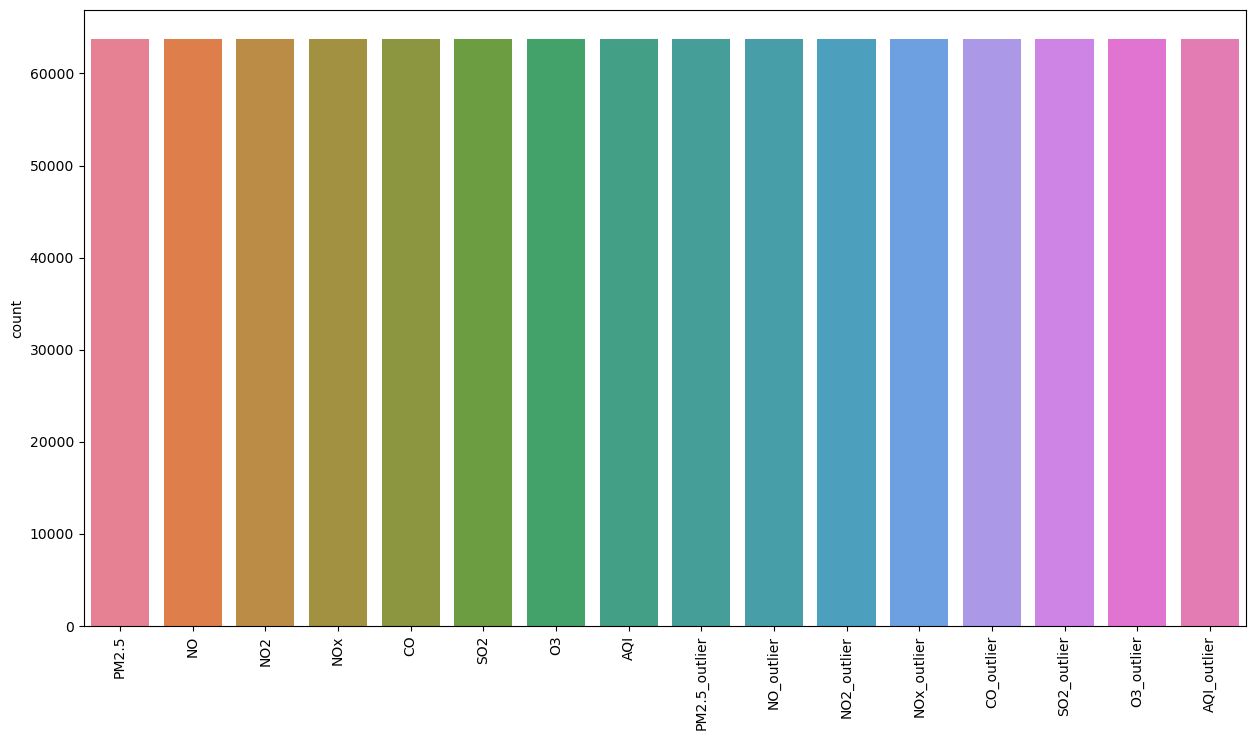

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(data)
plt.xticks(rotation=90)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63720 entries, 1 to 108034
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StationId      63720 non-null  object        
 1   StationName    63720 non-null  object        
 2   City           63720 non-null  object        
 3   State          63720 non-null  object        
 4   Status         63720 non-null  object        
 5   Date           63720 non-null  datetime64[ns]
 6   PM2.5          63720 non-null  float64       
 7   NO             63720 non-null  float64       
 8   NO2            63720 non-null  float64       
 9   NOx            63720 non-null  float64       
 10  CO             63720 non-null  float64       
 11  SO2            63720 non-null  float64       
 12  O3             63720 non-null  float64       
 13  AQI            63720 non-null  float64       
 14  AQI_Bucket     63720 non-null  object        
 15  PM2.5_outlier  63720 no

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Air Polutant Gas Anaylsis with year

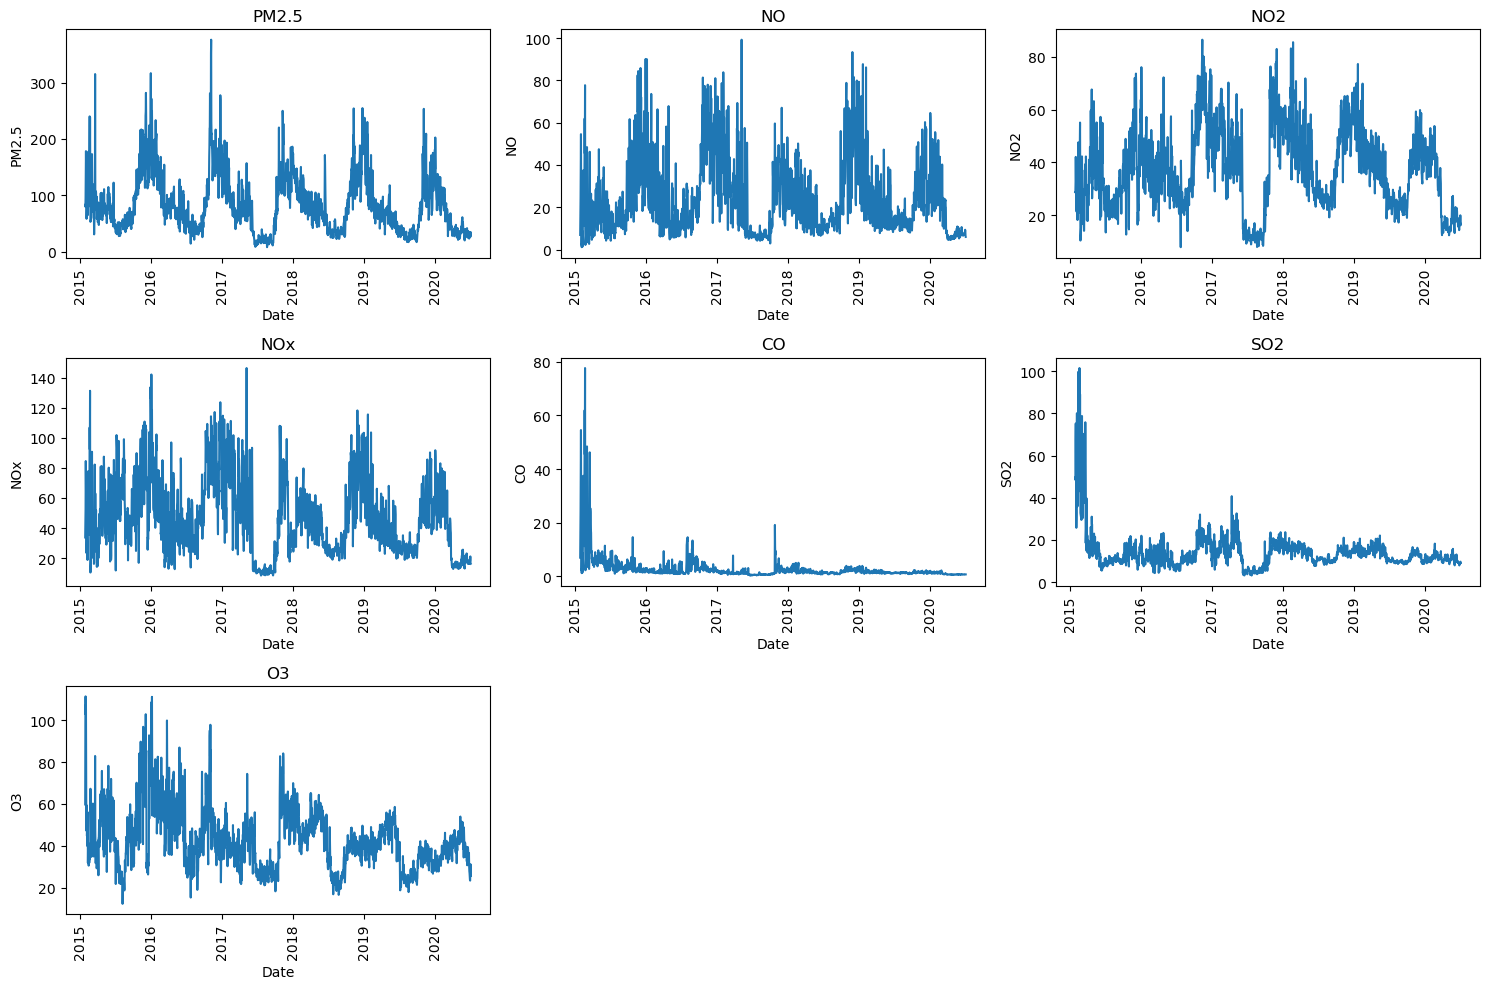

In [51]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']

plt.figure(figsize=(15,10))  

for i, par in enumerate(air_fet, 1):
    plt.subplot(3, 3, i)  
    sns.lineplot(data=data,x='Date',y=par,ci=None)
    plt.title(par)
    plt.xlabel('Date')
    plt.ylabel(par)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


* Datas of 2015 is irregular,maybe becuase of National Air Quality Index (NAQI) is just launched at 2015
*  Excepet Carbon Monoxide(co) ,majority of pollutant gas are max in starting of year and min in middle year,by end of year returns to max value
* Near aug-oct,nov month range pollutant gases increasing,maybe its becuase of festival time(like diwali),which cuases usage of fireworks in larger amount
* Trend analysis indicates a statistically significant downward trend in CO levels over the 5-year period (p < 0.05). This suggests reduced emissions   from primary CO sources such as vehicular traffic and combustion activities.
* from analysis indicates that every pollutant gases have minimum value at mid year of 2017-2018
* Over all Air poluutant gas levels significant downward trend over the 5 years period,indicating improvment of air quality

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63720 entries, 1 to 108034
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StationId      63720 non-null  object        
 1   StationName    63720 non-null  object        
 2   City           63720 non-null  object        
 3   State          63720 non-null  object        
 4   Status         63720 non-null  object        
 5   Date           63720 non-null  datetime64[ns]
 6   PM2.5          63720 non-null  float64       
 7   NO             63720 non-null  float64       
 8   NO2            63720 non-null  float64       
 9   NOx            63720 non-null  float64       
 10  CO             63720 non-null  float64       
 11  SO2            63720 non-null  float64       
 12  O3             63720 non-null  float64       
 13  AQI            63720 non-null  float64       
 14  AQI_Bucket     63720 non-null  object        
 15  PM2.5_outlier  63720 no

# AQI Trend Analysis With Year

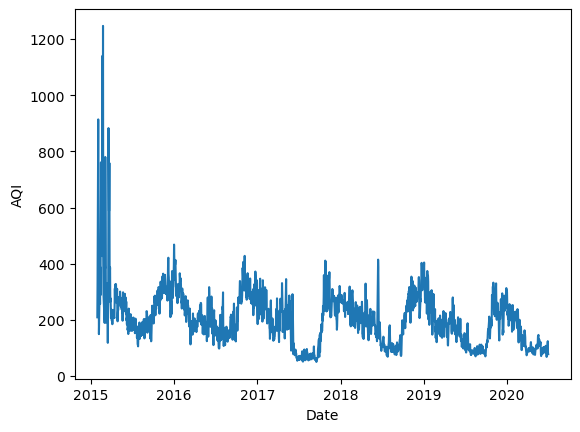

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=data,x='Date',y='AQI',ci=None)
plt.show()

* Datas of 2015 is irregular,maybe becuase of National Air Quality Index (NAQI) is just launched at 2015
* Trend decomposition of the AQI series reveals a cyclical pattern: an upward phase during January, a downward phase through mid-year, and a renewed upward trajectory toward December. This suggests that seasonal and meteorological factors play a significant role in pollutant concentration levels
* A recurring seasonal spike in AQI is observed in October–November. This rise coincides with Diwali-related firecracker emissions, stubble burning in northern India, and adverse meteorological conditions (low wind dispersion, temperature inversions). These factors collectively contribute to the deterioration of air quality during this period.
* Between mid-2017 and mid-2018, AQI reached its lowest observed values in the 5-year span. This decline may be attributed to favorable meteorological conditions (stronger monsoon dispersal), policy interventions (stricter vehicle emission norms, BS-IV rollout), and reduced anthropogenic activity during economic transitions (post-demonetization, GST introduction)
* The 5-year AQI trend is downward, reflecting reduced pollution levels. This may be linked to regulatory measures (e.g., BS-IV vehicle norms, stricter industrial controls), seasonal meteorological variations, and increased public awareness regarding pollution sources.

# State Wise AQI Analysis

In [54]:
data['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Delhi',
       'Gujarat', 'Haryana', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Mizoram', 'Odisha', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [55]:
data.groupby('State')['AQI'].describe()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Andhra Pradesh,1944.0,109.209362,56.399546,23.0,71.0,98.0,130.00,387.0
Assam,494.0,139.860324,112.731199,25.0,52.0,98.0,211.00,956.0
Bihar,1615.0,226.370279,122.490064,34.0,122.0,193.0,329.00,634.0
Chandigarh,283.0,95.289753,57.290978,26.0,60.0,81.0,108.00,335.0
Delhi,26463.0,244.988474,131.980815,22.0,134.0,224.0,331.00,1019.0
Gujarat,1211.0,454.360859,306.206263,48.0,234.0,381.0,547.00,1917.0
Haryana,1136.0,194.845070,106.257068,27.0,113.0,167.0,274.00,708.0
Karnataka,4171.0,95.046272,48.977453,16.0,62.0,87.0,113.00,464.0
Kerala,1159.0,74.830026,28.058161,32.0,55.0,68.0,87.00,230.0


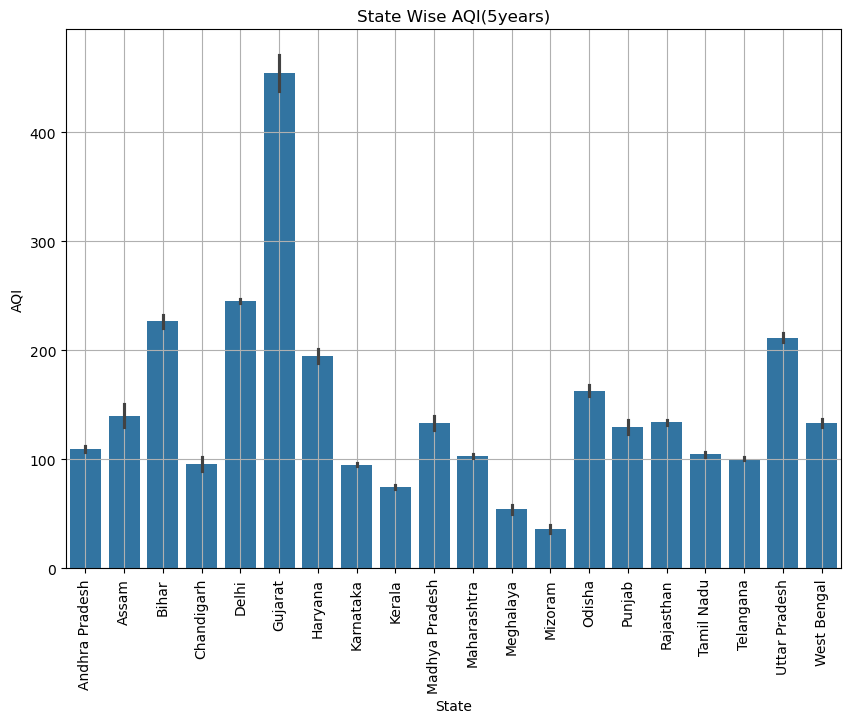

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(data=data,x=data['State'],y=data['AQI'])
plt.title('State Wise AQI(5years)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

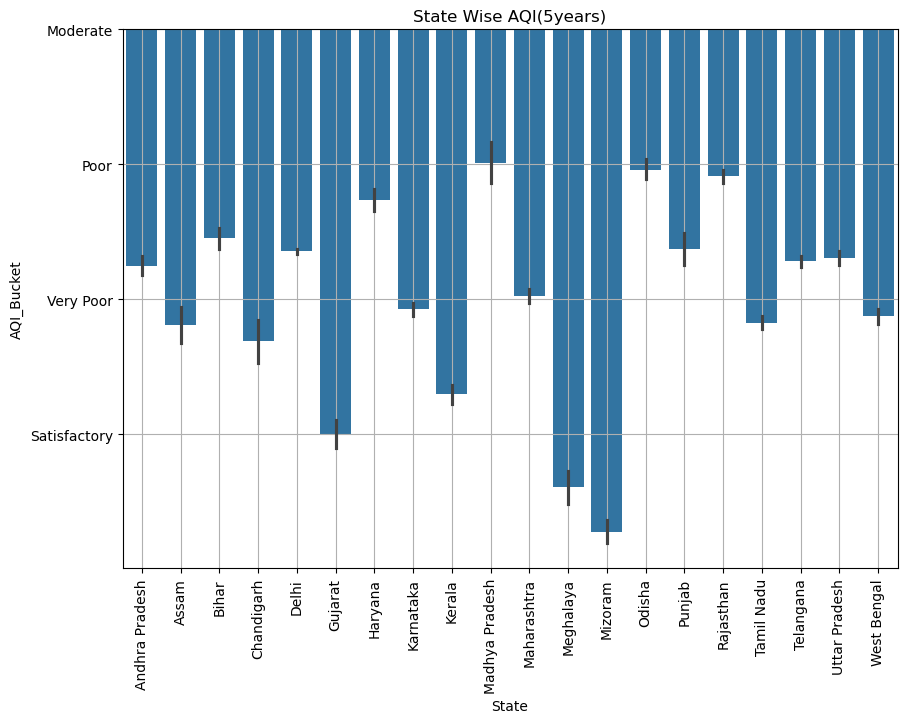

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(data=data,x=data['State'],y=data['AQI_Bucket'])
plt.title('State Wise AQI(5years)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

<p style="background-color:cyan;font-size:18px;">Based on the state-level aggregation of AQI values, Gujarat recorded the highest AQI, followed by Delhi, Bihar, and Uttar Pradesh, reflecting the impact of industrial activity, vehicular emissions, and urban expansion. In contrast, Mizoram, Meghalaya, Kerala, and Karnataka showed the lowest AQI values, likely due to their greener landscapes, lower industrialization, and better environmental conditions.</p>

<p style='background-color:red'>Remarks:-It is worth noting that Gujarat, despite registering the highest AQI average among states, does not appear in the ‘Poor’ category of the AQI classification plot. This can be explained by the fact that classification is based on absolute AQI ranges defined by CPCB/WHO standards, whereas the state-wise analysis highlights relative differences among states.</p>

# State Wise Air Polluttent Gas Analysis

In [58]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']
tab=data.groupby('State')[air_fet].mean()
tab=pd.DataFrame(tab)
tab

,PM2.5,NO,NO2,NOx,CO,SO2,O3
State,,,,,,,
Andhra Pradesh,44.045782,9.521466,31.205098,23.922258,0.758879,13.344182,37.824645
Assam,61.487773,19.861457,13.533806,43.952814,0.732004,14.574332,25.096437
Bihar,113.864291,28.932149,39.117344,47.159443,1.448613,20.537115,35.565560
Chandigarh,40.557102,10.624170,12.060424,15.306784,0.624912,10.146572,19.636007
Delhi,111.794824,34.659231,48.264614,59.274668,1.519025,14.509916,47.070327
Gujarat,69.775516,22.265194,60.619455,48.133146,22.061420,56.427696,38.897258
Haryana,93.782729,22.141945,29.067456,29.976092,0.850062,10.104234,43.261180
Karnataka,34.022033,11.740815,27.998283,26.941796,1.391057,5.704668,35.789736
Kerala,27.654323,3.973952,9.852571,9.412425,0.948007,5.707575,35.377947


In [59]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']
tb1=tab[air_fet].idxmax()
tbmax=pd.DataFrame(tb1)

In [60]:
tbmax

,0
PM2.5,Bihar
NO,Delhi
NO2,Gujarat
NOx,Delhi
CO,Gujarat
SO2,Gujarat
O3,Madhya Pradesh


> Air pollutants and the states with the highest levels

In [61]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']
tb2=tab[air_fet].idxmin()
tbmax=pd.DataFrame(tb2)
tbmax

,0
PM2.5,Mizoram
NO,Meghalaya
NO2,Mizoram
NOx,Meghalaya
CO,Meghalaya
SO2,Karnataka
O3,Mizoram


> Air pollutants and the states with the lowest levels

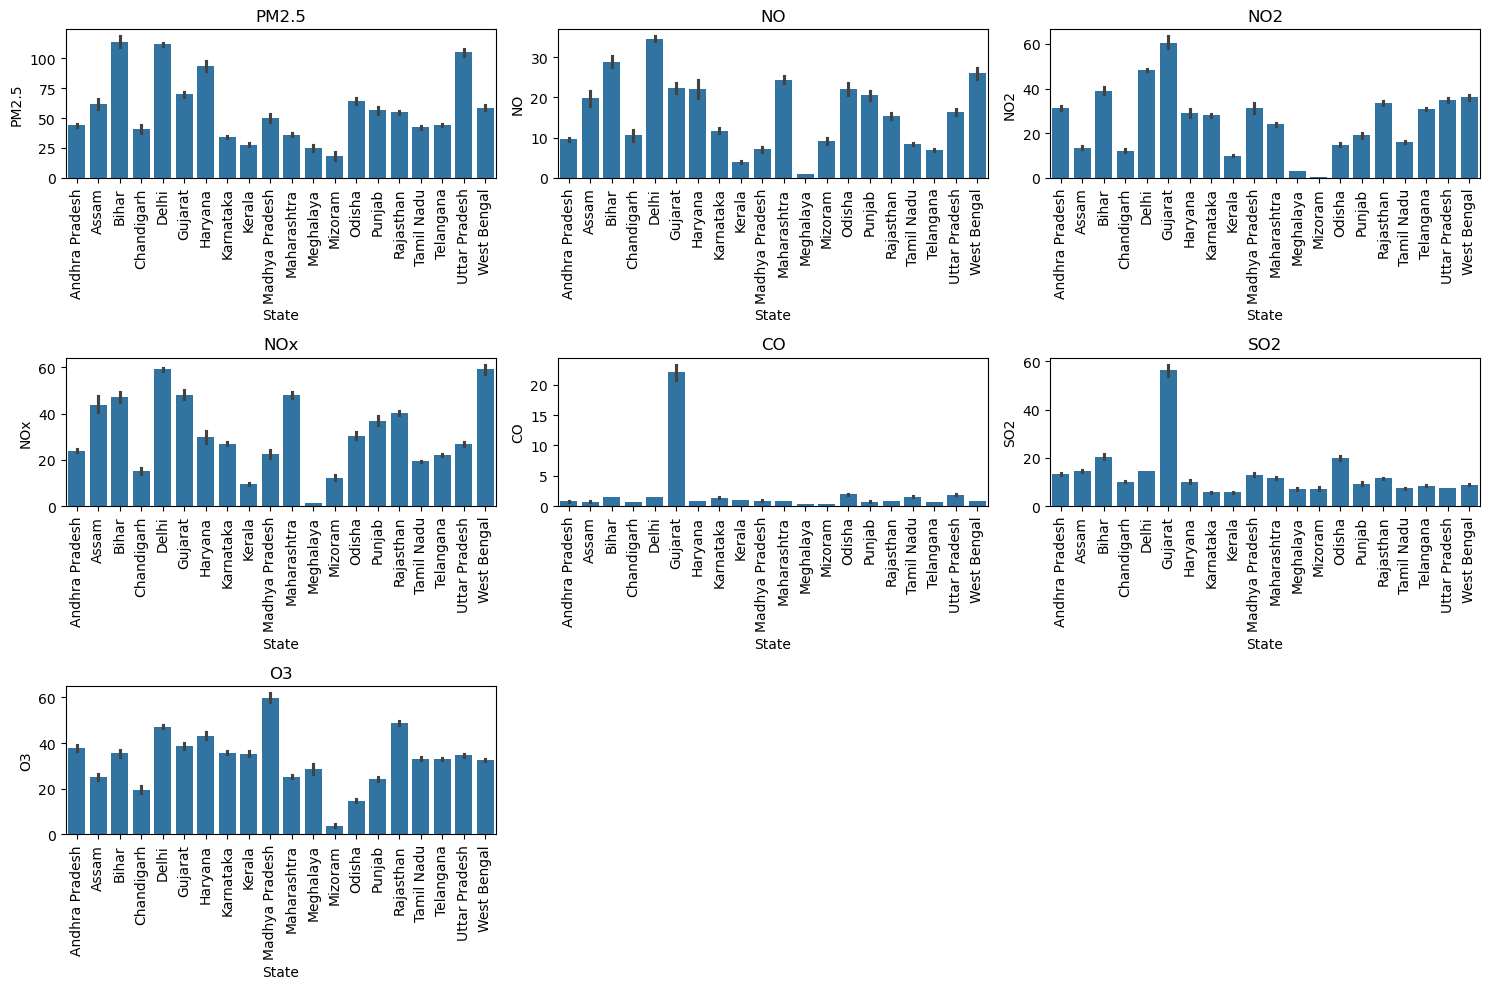

In [62]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']

plt.figure(figsize=(15,10))  

for i, par in enumerate(air_fet, 1):
    plt.subplot(3, 3, i)  
    sns.barplot(data=data,x='State',y=par)
    plt.title(par)
    plt.ylabel(par)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Findings on State-wise Air Pollutant Concentrations

* Gujarat and Delhi exhibit consistently high concentrations across multiple pollutant features, indicating elevated air pollution levels.

* Madhya Pradesh stands out with comparatively higher O₃ (ozone) levels, suggesting region-specific atmospheric or climatic influences.

* Meghalaya and Mizoram show lower pollutant levels across most features, representing relatively cleaner air quality among the analyzed states.

* Karnataka records lower SO₂ levels compared to other states, highlighting limited industrial SO₂ emissions.

* Carbon Monoxide (CO) is significantly higher in Gujarat than in any other state, with values far exceeding the observed range elsewhere, indicating a unique and substantial source contribution.

## Interpretation:

<p style="background-color:cyan;font-size:18px">These variations emphasize that air pollution sources are not uniformly distributed across states. While Delhi and Gujarat face multi-pollutant stress, other states like Meghalaya and Mizoram maintain comparatively low pollution. Gujarat’s anomalously high CO levels demand further investigation into local industrial, vehicular, or biomass-burning activities.</p>

# City Wise AQI Analysis

In [63]:
data['City'].unique()

array(['Amaravati', 'Visakhapatnam', 'Guwahati', 'Patna', 'Chandigarh',
       'Delhi', 'Ahmedabad', 'Gurugram', 'Bengaluru',
       'Thiruvananthapuram', 'Bhopal', 'Mumbai', 'Shillong', 'Aizawl',
       'Brajrajnagar', 'Talcher', 'Amritsar', 'Jaipur', 'Chennai',
       'Coimbatore', 'Hyderabad', 'Lucknow', 'Kolkata'], dtype=object)

In [64]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']
tab=data.groupby('City')[air_fet].mean()
tab=pd.DataFrame(tab)
tab

,PM2.5,NO,NO2,NOx,CO,SO2,O3
City,,,,,,,
Ahmedabad,69.775516,22.265194,60.619455,48.133146,22.061420,56.427696,38.897258
Aizawl,18.089010,9.170495,0.386238,12.296733,0.286535,7.130693,3.709901
Amaravati,39.020164,4.480415,22.554969,15.618667,0.618931,14.186226,38.588616
Amritsar,56.521087,20.590652,19.090435,36.884550,0.734441,9.333711,24.406537
Bengaluru,34.022033,11.740815,27.998283,26.941796,1.391057,5.704668,35.789736
Bhopal,50.207230,7.029460,31.373561,22.446115,0.880719,13.060432,59.824209
Brajrajnagar,64.234812,13.646792,17.062111,25.572815,2.060458,10.544092,13.926318
Chandigarh,40.557102,10.624170,12.060424,15.306784,0.624912,10.146572,19.636007
Chennai,43.382347,8.450187,15.114528,18.264952,1.580921,7.228730,33.413610


In [65]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']
tb1=tab[air_fet].idxmax()
tbmax=pd.DataFrame(tb1)
tbmax

,0
PM2.5,Patna
NO,Delhi
NO2,Ahmedabad
NOx,Delhi
CO,Ahmedabad
SO2,Ahmedabad
O3,Bhopal


> Air pollutants and the City with the highest levels

In [66]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']
tb1=tab[air_fet].idxmin()
tbmin=pd.DataFrame(tb1)
tbmin

,0
PM2.5,Aizawl
NO,Shillong
NO2,Aizawl
NOx,Shillong
CO,Shillong
SO2,Bengaluru
O3,Aizawl


> Air pollutants and the City with the lowest levels

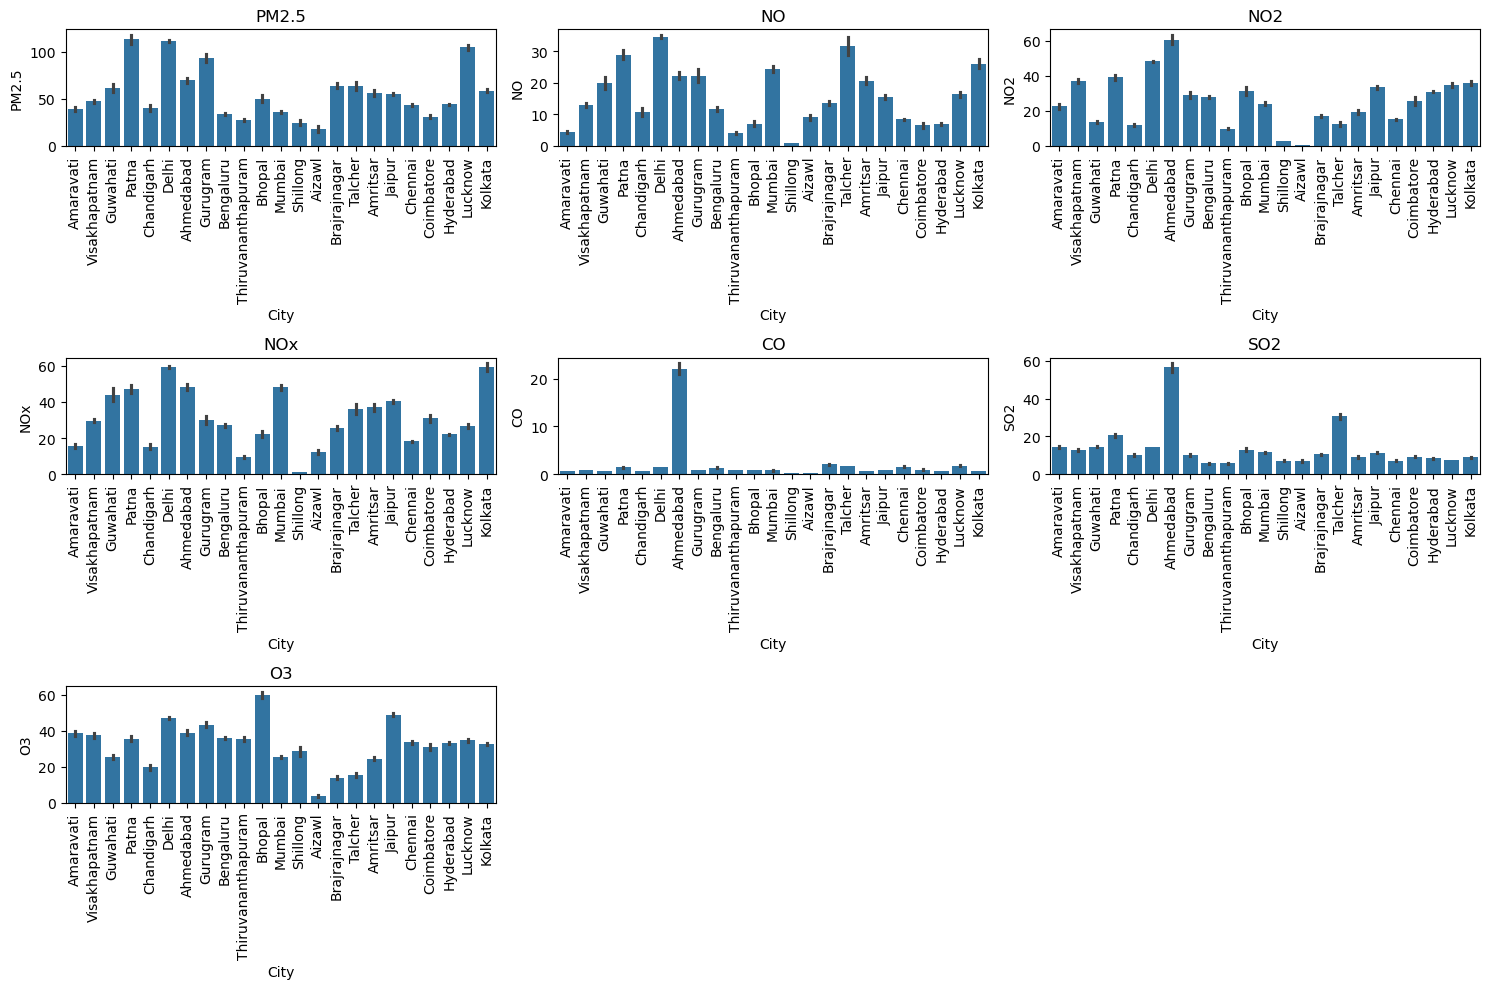

In [67]:
air_fet = ['PM2.5','NO','NO2','NOx','CO','SO2','O3']

plt.figure(figsize=(15,10))  

for i, par in enumerate(air_fet, 1):
    plt.subplot(3, 3, i)  
    sns.barplot(data=data,x='City',y=par)
    plt.title(par)
    plt.ylabel(par)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# City-wise Air Pollutant Extremes

## Findings

- **PM2.5**
  - Highest: **Patna** → significant particulate matter concentration, likely from urban emissions and limited dispersion.  
  - Lowest: **Aizawl** → clean air quality, minimal PM sources.  

- **NO & NOx**
  - Highest: **Delhi** → heavy vehicular and industrial combustion sources.  
  - Lowest: **Shillong** → negligible NOx-related emissions.  

- **NO₂**
  - Highest: **Ahmedabad** → strong industrial/traffic contributions.  
  - Lowest: **Aizawl** → low urban-industrial activity.  

- **CO (Carbon Monoxide)**
  - Highest: **Ahmedabad** → hotspot for incomplete combustion (industrial/vehicular).  
  - Lowest: **Shillong** → relatively unpolluted environment.  

- **SO₂**
  - Highest: **Ahmedabad** → strong industrial sulfur emissions.  
  - Lowest: **Bengaluru** → cleaner energy usage and stricter emission controls.  

- **O₃ (Ozone)**
  - Highest: **Bhopal** → photochemical reactions in urban atmosphere.  
  - Lowest: **Aizawl** → less precursor activity, cleaner conditions.  

---

## Interpretation

- **Delhi and Ahmedabad** emerge as **pollution hotspots** with multiple pollutants peaking.  
- **Shillong and Aizawl** consistently report the **lowest pollutant concentrations**, indicating cleaner environments.  
- **Patna (PM2.5)** and **Bhopal (O₃)** show pollutant-specific spikes, suggesting localized factors.  
- Results highlight the **heterogeneity of air pollution** across Indian cities — with some facing multi-pollutant stress while others benefit from low anthropogenic activity and geographic advantages.  


<h1 style="background-color:green">    </h1>

## Model Building

## Classification Model

In [68]:
data.head()

,StationId,StationName,City,State,Status,Date,PM2.5,NO,NO2,NOx,...,AQI,AQI_Bucket,PM2.5_outlier,NO_outlier,NO2_outlier,NOx_outlier,CO_outlier,SO2_outlier,O3_outlier,AQI_outlier
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,1.44,20.50,12.08,...,184.0,Moderate,False,False,False,False,False,False,True,False
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,1.26,26.00,14.85,...,197.0,Moderate,False,False,False,False,False,False,True,False
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,6.60,30.85,21.77,...,198.0,Moderate,False,False,False,False,False,True,True,False
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,2.56,28.07,17.01,...,188.0,Moderate,False,False,False,False,False,False,True,False
5,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-29,72.47,5.23,23.20,16.59,...,173.0,Moderate,False,False,False,False,False,False,True,False


In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, roc_curve, auc,mean_absolute_error,mean_squared_error,r2_score

In [70]:
data.head()

,StationId,StationName,City,State,Status,Date,PM2.5,NO,NO2,NOx,...,AQI,AQI_Bucket,PM2.5_outlier,NO_outlier,NO2_outlier,NOx_outlier,CO_outlier,SO2_outlier,O3_outlier,AQI_outlier
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,1.44,20.50,12.08,...,184.0,Moderate,False,False,False,False,False,False,True,False
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,1.26,26.00,14.85,...,197.0,Moderate,False,False,False,False,False,False,True,False
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,6.60,30.85,21.77,...,198.0,Moderate,False,False,False,False,False,True,True,False
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,2.56,28.07,17.01,...,188.0,Moderate,False,False,False,False,False,False,True,False
5,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-29,72.47,5.23,23.20,16.59,...,173.0,Moderate,False,False,False,False,False,False,True,False


In [71]:
data['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [72]:
le = LabelEncoder()
data['AQI_Bucket'] = le.fit_transform(data['AQI_Bucket'])

print("Label Encoding Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

Label Encoding Mapping:
Good: 0
Moderate: 1
Poor: 2
Satisfactory: 3
Severe: 4
Very Poor: 5


In [73]:
data.columns

Index(['StationId', 'StationName', 'City', 'State', 'Status', 'Date', 'PM2.5',
       'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI', 'AQI_Bucket',
       'PM2.5_outlier', 'NO_outlier', 'NO2_outlier', 'NOx_outlier',
       'CO_outlier', 'SO2_outlier', 'O3_outlier', 'AQI_outlier'],
      dtype='object')

In [74]:
fet=['PM2.5','NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI']
x=data[fet]
y=data['AQI_Bucket']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rfclass=RandomForestClassifier(n_estimators=100,random_state=42)
rfclass.fit(X_train,y_train)
y_pred = rfclass.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00      4419
           2       1.00      1.00      1.00      1636
           3       1.00      1.00      1.00      3340
           4       1.00      1.00      1.00       848
           5       1.00      1.00      1.00      1687

    accuracy                           1.00     12744
   macro avg       1.00      1.00      1.00     12744
weighted avg       1.00      1.00      1.00     12744



[]

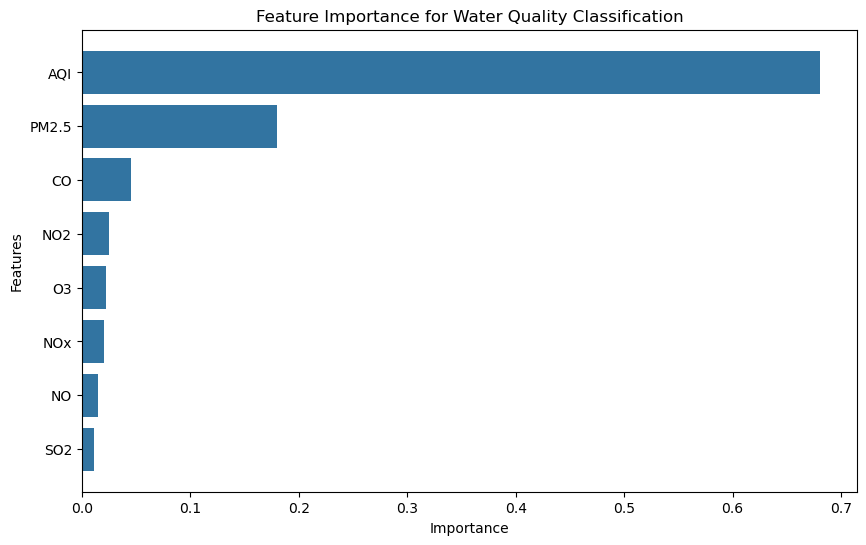

In [75]:
fetimpo=pd.DataFrame({ 'Features':fet ,'Importance':rfclass.feature_importances_ })
fetimpo=fetimpo.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=fetimpo)
plt.title('Feature Importance for Water Quality Classification')
plt.plot()

> Feature which affects classification is AQI(Air Quality Index

### Results

The model achieves an accuracy of 1.00, indicating that it correctly classified all instances in the test set. The precision, recall, and F1-score are also all 1.00 for each class, suggesting that the model is highly accurate and effective at classifying water quality.

# Rgresssion Model For AQI

In [76]:
fet=['PM2.5','NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', ]
x=data[fet]
y=data['AQI']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rfreg=RandomForestRegressor(n_estimators=100,random_state=42)
rfreg.fit(X_train,y_train)
y_pred = rfreg.predict(X_test)


In [77]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2:",r2_score(y_test,y_pred))

MAE: 26.73949701820465
MSE: 44.143178634822796
R2: 0.8955286442824737


[]

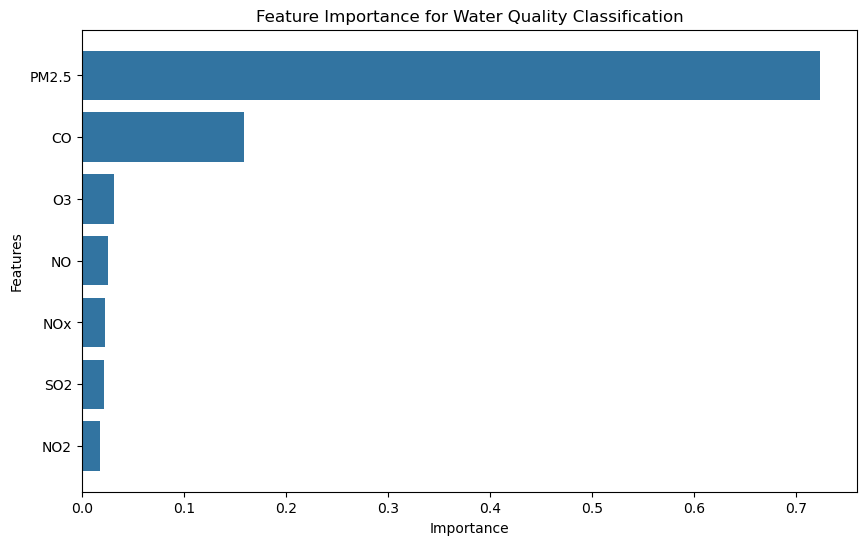

In [78]:
fetimpo=pd.DataFrame({ 'Features':fet ,'Importance':rfreg.feature_importances_ })
fetimpo=fetimpo.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=fetimpo)
plt.title('Feature Importance for Water Quality Classification')
plt.plot()

> Feature which affects classification is PM2.5

### Result

The regression model demonstrates high predictive accuracy with strong explanatory power. While minor prediction errors remain (average ~26 units), the model effectively generalizes to the underlying data distribution. It is suitable for deployment, but further fine-tuning or feature engineering could help reduce the residual error.

In [79]:
import joblib
joblib.dump(rfreg, "air_quality_model.pkl")

['air_quality_model.pkl']